# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.142702e+01     1.098140e+01
 * time: 0.0017011165618896484
     1     3.057484e+01     4.982363e+00
 * time: 0.007233142852783203
     2     2.338078e+01     6.662190e+00
 * time: 0.013312101364135742
     3     2.252996e+01     1.031816e+01
 * time: 0.01945209503173828
     4     1.183369e+01     2.412328e+00
 * time: 0.026476144790649414
     5     9.707711e+00     1.531163e+00
 * time: 0.032753944396972656
     6     9.260629e+00     1.837861e+00
 * time: 0.03799104690551758
     7     8.782854e+00     9.670875e-01
 * time: 0.04394793510437012
     8     8.486689e+00     1.004004e+00
 * time: 0.04953598976135254
     9     8.277628e+00     1.007223e+00
 * time: 0.05504107475280762
    10     8.120954e+00     6.915023e-01
 * time: 0.06126809120178223
    11     8.018070e+00     7.126151e-01
 * time: 0.06679797172546387
    12     7.954510e+00     5.322822e-01
 * time: 0.07173299789428711
    13     7.922064e+00     4.978516e-01
 *

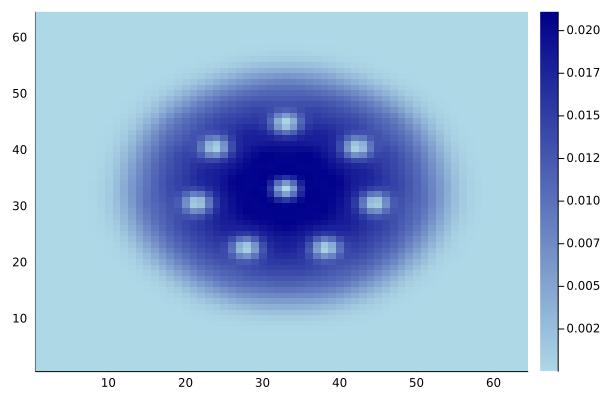

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)